In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
pd.set_option('display.max_columns',70)
import warnings
warnings.filterwarnings('ignore')

In [63]:
#load dataset
df=pd.read_csv('Black_Friday.csv')

In [17]:
#show dataframe
df.head()

,User_ID,Product_ID,Gender,Age,Category,City_Category,Stay_In_Current_City_Years,Marital_Status,Card_brand,Card_Type,Product_Category_3,Purchase,Country,Discount,Bulk_Discount_Amount,Shipping_Cost,Items_in_Cart,Purchase_2,Time_Spent
0,1000001,P00069042,Female,0-17,Cosmetic,Rural,2,Unmarried,Visa,Debit,14,34460.0,Austria,22,42.31,1645,6,24924.50,1
1,1000001,P00248942,Female,0-17,Travel,Rural,2,Unmarried,Visa,Debit,14,33780.0,United Kingdom,23,42.31,658,94,11737.12,26
2,1000001,P00087842,Female,0-17,Clothing,Rural,2,Unmarried,Visa,Debit,14,40745.0,France,30,42.31,1926,63,13223.76,17
3,1000001,P00085442,Female,0-17,Cosmetic,Rural,2,Unmarried,Visa,Credit,14,12693.0,China,22,42.31,865,26,37.44,45
4,1000002,P00285442,M,55+,Electronics,Sub-Metro,4,Unmarried,Mastercard,Debit (Prepaid),14,35.0,United States,20,42.31,764,98,1085.29,28


In [19]:
#check data dimension
df.shape

(421570, 19)

In [27]:
#describe data
df.describe()

,User_ID,Stay_In_Current_City_Years,Product_Category_3,Purchase,Discount,Bulk_Discount_Amount,Shipping_Cost,Items_in_Cart,Purchase_2,Time_Spent
count,4.215700e+05,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,1.002985e+06,1.859423,13.589439,24130.386906,35.932768,60.090059,600.786185,50.432139,15981.258123,44.260317
std,1.711225e+03,1.289944,2.365380,17282.943801,11.267830,18.447931,346.323464,28.849221,22711.183519,30.492054
min,1.000001e+06,0.000000,3.000000,0.000000,14.000000,-2.060000,-413.000000,1.000000,-4988.940000,1.000000
25%,1.001491e+06,1.000000,14.000000,8083.250000,26.000000,46.680000,301.000000,25.000000,2079.650000,18.000000
50%,1.003029e+06,2.000000,14.000000,23511.000000,36.000000,62.090000,602.000000,50.000000,7612.030000,37.000000
75%,1.004408e+06,3.000000,14.000000,39210.000000,46.000000,74.280000,900.000000,75.000000,20205.852500,74.000000
max,1.006040e+06,4.000000,18.000000,151223.000000,80.000000,100.140000,2055.000000,100.000000,693099.360000,99.000000


In [29]:
#transpose data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,421570.0,1.002985e+06,1711.225005,1000001.00,1001491.00,1003029.00,1.004408e+06,1006040.00
Stay_In_Current_City_Years,421570.0,1.859423e+00,1.289944,0.00,1.00,2.00,3.000000e+00,4.00
Product_Category_3,421570.0,1.358944e+01,2.365380,3.00,14.00,14.00,1.400000e+01,18.00
Purchase,421570.0,2.413039e+04,17282.943801,0.00,8083.25,23511.00,3.921000e+04,151223.00
Discount,421570.0,3.593277e+01,11.267830,14.00,26.00,36.00,4.600000e+01,80.00
Bulk_Discount_Amount,421570.0,6.009006e+01,18.447931,-2.06,46.68,62.09,7.428000e+01,100.14
Shipping_Cost,421570.0,6.007862e+02,346.323464,-413.00,301.00,602.00,9.000000e+02,2055.00
Items_in_Cart,421570.0,5.043214e+01,28.849221,1.00,25.00,50.00,7.500000e+01,100.00
Purchase_2,421570.0,1.598126e+04,22711.183519,-4988.94,2079.65,7612.03,2.020585e+04,693099.36
Time_Spent,421570.0,4.426032e+01,30.492054,1.00,18.00,37.00,7.400000e+01,99.00


In [31]:
#describe data
df.describe(include='object')

,Product_ID,Gender,Age,Category,City_Category,Marital_Status,Card_brand,Card_Type,Country
count,421570,421570,421570,421570,421570,421570,421570,421570,421570
unique,3584,2,7,6,3,2,4,3,136
top,P00265242,M,26-35,Restaurant,Metro,Unmarried,Mastercard,Debit,United States
freq,1411,317997,168088,70870,177802,249184,220144,240835,106790


In [33]:
#check columns 
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Category', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Card_brand',
       'Card_Type', 'Product_Category_3', 'Purchase', 'Country', 'Discount',
       'Bulk_Discount_Amount', 'Shipping_Cost', 'Items_in_Cart', 'Purchase_2',
       'Time_Spent'],
      dtype='object')

In [71]:
#check datatypes
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Category                       object
City_Category                  object
Stay_In_Current_City_Years      int64
Marital_Status                 object
Card_brand                     object
Card_Type                      object
Product_Category_3              int64
Purchase                      float64
Country                        object
Discount                        int64
Bulk_Discount_Amount          float64
Shipping_Cost                   int64
Items_in_Cart                   int64
Purchase_2                    float64
Time_Spent                      int64
dtype: object

In [45]:
#create data subset
df[[#'User_ID',
 #'Product_ID', 
 'Gender', 'Age', 'Category', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Card_brand',
       'Card_Type', 'Product_Category_3', 'Purchase', 'Country', 'Discount',
       'Bulk_Discount_Amount', 'Shipping_Cost', 'Items_in_Cart', 'Purchase_2',
       'Time_Spent']]

,Gender,Age,Category,City_Category,Stay_In_Current_City_Years,Marital_Status,Card_brand,Card_Type,Product_Category_3,Purchase,Country,Discount,Bulk_Discount_Amount,Shipping_Cost,Items_in_Cart,Purchase_2,Time_Spent
0,Female,0-17,Cosmetic,Rural,2,Unmarried,Visa,Debit,14,34460.0,Austria,22,42.31,1645,6,24924.50,1
1,Female,0-17,Travel,Rural,2,Unmarried,Visa,Debit,14,33780.0,United Kingdom,23,42.31,658,94,11737.12,26
2,Female,0-17,Clothing,Rural,2,Unmarried,Visa,Debit,14,40745.0,France,30,42.31,1926,63,13223.76,17
3,Female,0-17,Cosmetic,Rural,2,Unmarried,Visa,Credit,14,12693.0,China,22,42.31,865,26,37.44,45
4,M,55+,Electronics,Sub-Metro,4,Unmarried,Mastercard,Debit (Prepaid),14,35.0,United States,20,42.31,764,98,1085.29,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,Female,18-25,Travel,Sub-Metro,2,Unmarried,Discover,Credit,14,16335.0,China,26,58.85,331,43,26240.14,13
421566,Female,18-25,Market,Sub-Metro,2,Unmarried,Mastercard,Debit,14,28606.0,China,19,58.85,824,1,2660.02,16
421567,Female,18-25,Market,Sub-Metro,2,Unmarried,Visa,Debit,8,5888.0,China,53,58.85,911,34,4131.54,32
421568,Female,18-25,Restaurant,Sub-Metro,2,Unmarried,Mastercard,Debit,14,25692.0,China,55,58.85,515,87,717.82,83


In [69]:
df1 = df[['Gender', 'Age', 'Category', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Card_brand',
       'Card_Type', 'Product_Category_3', 'Purchase', 'Country', 'Discount',
       'Bulk_Discount_Amount', 'Shipping_Cost', 'Items_in_Cart', 'Purchase_2',
       'Time_Spent']].copy()

In [75]:
df1.dtypes

Gender                         object
Age                            object
Category                       object
City_Category                  object
Stay_In_Current_City_Years      int64
Marital_Status                 object
Card_brand                     object
Card_Type                      object
Product_Category_3              int64
Purchase                      float64
Country                        object
Discount                        int64
Bulk_Discount_Amount          float64
Shipping_Cost                   int64
Items_in_Cart                   int64
Purchase_2                    float64
Time_Spent                      int64
dtype: object

In [79]:
#check missing values 
df1.isna()

,Gender,Age,Category,City_Category,Stay_In_Current_City_Years,Marital_Status,Card_brand,Card_Type,Product_Category_3,Purchase,Country,Discount,Bulk_Discount_Amount,Shipping_Cost,Items_in_Cart,Purchase_2,Time_Spent
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421568,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [81]:
df1.isna().sum()

Gender                        0
Age                           0
Category                      0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Card_brand                    0
Card_Type                     0
Product_Category_3            0
Purchase                      0
Country                       0
Discount                      0
Bulk_Discount_Amount          0
Shipping_Cost                 0
Items_in_Cart                 0
Purchase_2                    0
Time_Spent                    0
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     421570 non-null  int64  
 1   Product_ID                  421570 non-null  object 
 2   Gender                      421570 non-null  object 
 3   Age                         421570 non-null  object 
 4   Category                    421570 non-null  object 
 5   City_Category               421570 non-null  object 
 6   Stay_In_Current_City_Years  421570 non-null  int64  
 7   Marital_Status              421570 non-null  object 
 8   Card_brand                  421570 non-null  object 
 9   Card_Type                   421570 non-null  object 
 10  Product_Category_3          421570 non-null  int64  
 11  Purchase                    421570 non-null  float64
 12  Country                     421570 non-null  object 
 13  Discount      

In [85]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Length: 421570, dtype: bool

In [89]:
df1.Card_brand.value_counts()

Card_brand
Mastercard    220144
Visa          159526
Amex           27552
Discover       14348
Name: count, dtype: int64

<Axes: xlabel='Card_brand'>

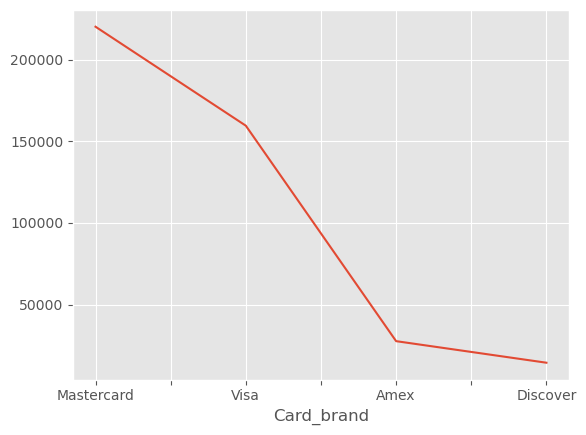

In [91]:
df1.Card_brand.value_counts().plot()

<Axes: title={'center': 'Card_Brand'}, xlabel='Card_brand'>

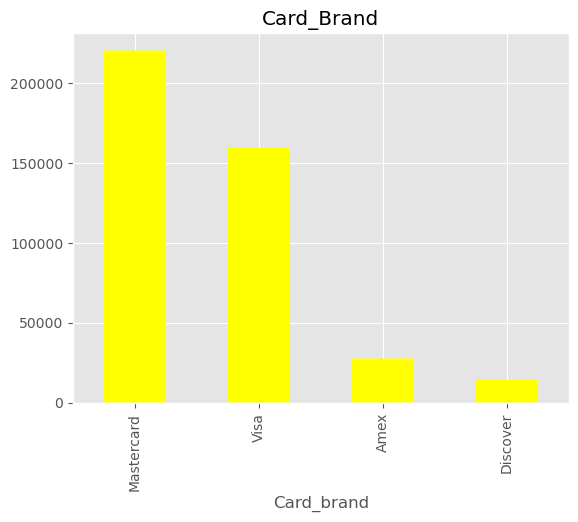

In [107]:
df1.Card_brand.value_counts().\
plot(kind='bar',title='Card_Brand',color='yellow')

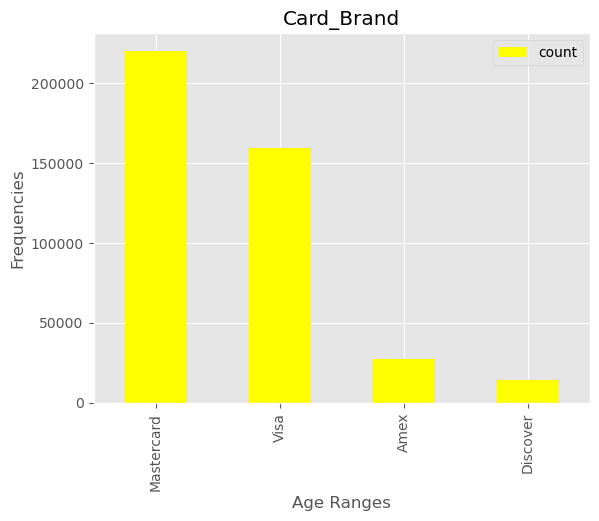

In [105]:
ax=df1.Card_brand.value_counts().\
plot(kind='bar',title='Card_Brand',color='yellow')
ax.set_xlabel('Age Ranges')
ax.set_ylabel('Frequencies')
ax.legend()
plt.show()

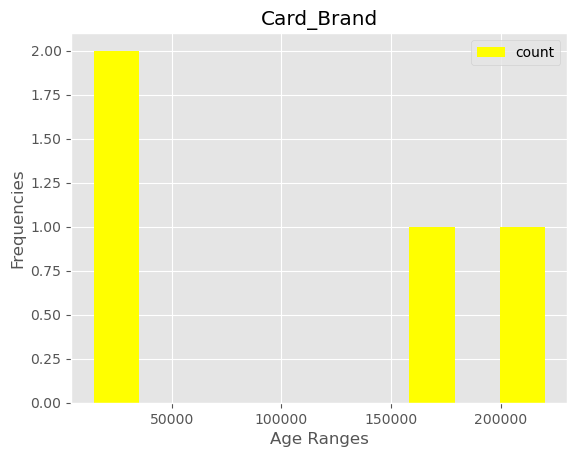

In [109]:
ax=df1.Card_brand.value_counts().\
plot(kind='hist',title='Card_Brand',color='yellow')
ax.set_xlabel('Age Ranges')
ax.set_ylabel('Frequencies')
ax.legend()
plt.show()

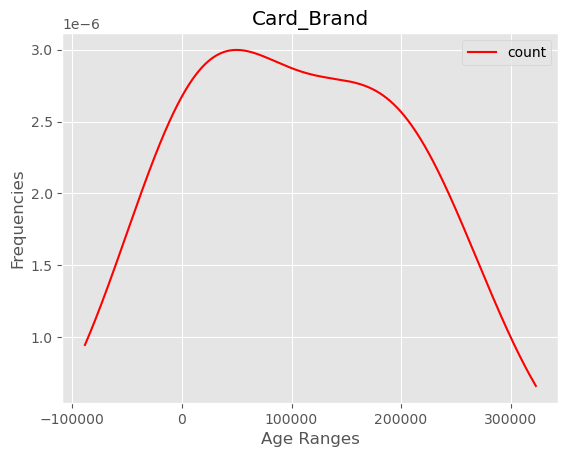

In [115]:
ax=df1.Card_brand.value_counts().\
plot(kind='kde',title='Card_Brand',color='red')
ax.set_xlabel('Age Ranges')
ax.set_ylabel('Frequencies')
ax.legend()
plt.show()